![](image.png)

# Neural Data Science with Python (or MATLAB) - Day 1
* https://www.meetup.com/brain-and-consciousness/events/276647434/
![](meetupgroup.png)

# Neural Data Science by Erik Nylen and Pascal Wallisch
* https://www.amazon.com/gp/product/B06XCW39WX
* Jupyter notebooks and datasets at: https://www.elsevier.com/books-and-journals/book-companion/9780128040430/chapter-files#Chapter%20Files
![](BookCover.jpg)

# Other resources
![](transparent_banner_MMS_100px.gif)
* https://nba.uth.tmc.edu/neuroscience/s1/introduction.html

![](scientifica.png)

* https://www.scientifica.uk.com/learning-zone/neuronal-electrophysiology-the-study-of-excitable-cells#
* https://www.scientifica.uk.com/products/scientifica-holostim-3d

# Forms of neural data
### * electrophysiology data
![](many%20ephys.png)
### * microscopy (light or electron)
![](EM.png)
### * ECG or other heart beat sensor
![](ECG.png)


### * fNIRS, EEG, EOG, EMG
REVIEW ARTICLE
Front. Neurorobot., 24 July 2017 | https://doi.org/10.3389/fnbot.2017.00035 |
Hybrid Brain–Computer Interface Techniques for Improved Classification Accuracy and Increased Number of Commands: A Review | 
Keum-Shik Hong and Muhammad Jawad Khan
![](Hong%20Khan%20et%20al%202017.png)

# Chapter 3
## Wrangling Spike Trains
![](scientifica%20ephys.png)
![](spiketrain.png)

In [1]:
import numpy as np
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.3g" % x))
import matplotlib.pyplot as plt

In [2]:
# toy dataset: spike train
spikeTrain = [0,0,0,0,0,  0,0,0,0,1,  0,1,0,1,0,  0,0,1,0,0,  0]  # 1 indicates spike/action potential
spikeTrain

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0]

In [3]:
# sum:
print(  sum(spikeTrain), "spikes in spikeTrain."  )

4 spikes in spikeTrain.


In [4]:
# each index is a time point
print(  len(spikeTrain), "time points"  )

21 time points


In [5]:
times = list( range(21) )
print(  np.array([spikeTrain,times])  )

[[ 0  0  0  0  0  0  0  0  0  1  0  1  0  1  0  0  0  1  0  0  0]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]]


In [6]:
# Python uses zero-based indexing 
spikeTrain[9]

1

In [7]:
# Finds first index with value "1"
spikeTrain.index(1)

9

### Optogenetics
* https://www.addgene.org/guides/optogenetics/
<img src="optogenetics.png" width="1000">

In [8]:
lightOnsetTime = 5
spikeValue = 1

latencyToFirstSpike = spikeTrain[lightOnsetTime:].index(spikeValue)
print(  'latency to first spike:', latencyToFirstSpike  )

latency to first spike: 4


In [9]:
# List comprehension to catch all spikes
spikeTimes = np.array(  [i for i,x in enumerate(spikeTrain) if x==1]  )
print(  'relative to start time:', spikeTimes  )
print(  'relative to light onset:', spikeTimes-lightOnsetTime  )

relative to start time: [ 9 11 13 17]
relative to light onset: [ 4  6  8 12]


## Raster plots

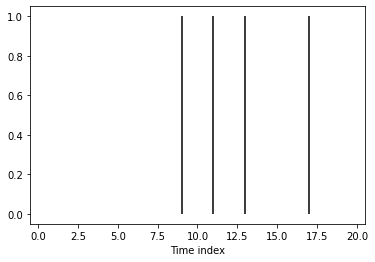

In [10]:
# Single sequence
plt.vlines(spikeTimes, 0, 1, color='k')
plt.xlabel('Time index')
plt.xlim(-0.5,20.5)
plt.show()

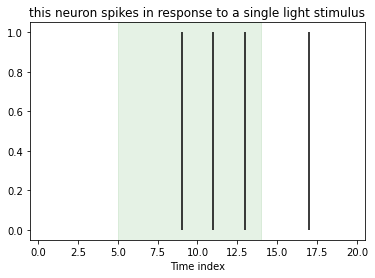

In [11]:
# Show light stimulus
plt.vlines(spikeTimes, 0, 1, color='k')
plt.xlabel('Time index')
plt.xlim(-0.5,20.5)

plt.axvspan(5,14,alpha=0.1, color='g')
plt.title('this neuron spikes in response to a single light stimulus')

plt.show()

In [12]:
# Multiple trials
tenSpikeTrains = [[0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0],[0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,
0,1,0,0,0],[0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0],
[0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0],[0,0,0,0,0,
0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0],[1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0],[0,0,0,0,0,0,0,0,1,1,0
,0,1,1,0,0,1,1,0,0,0],[0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0]]

print(len(tenSpikeTrains), 'spike trains', '\n')
for i, trial in enumerate(tenSpikeTrains):
    print(i, trial)

10 spike trains 

0 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0]
1 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]
2 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]
3 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]
4 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
5 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]
6 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0]
7 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]
8 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0]
9 [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0]


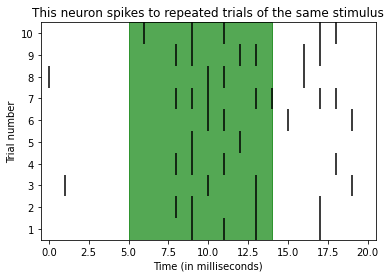

In [13]:
for trial in range(len(tenSpikeTrains)):
    spikeTimes = [i for i, x in enumerate(tenSpikeTrains[trial]) if x==1]
    plt.vlines(spikeTimes, trial, trial+1, color='k')      # Plot all trials in raster plot
    
    plt.axvspan(5, 14, alpha=0.1, color='g')      # Show light timing
plt.xlim(-0.5, 20.5)
plt.xlabel('Time (in milliseconds)')
plt.ylim(0, 10)
plt.yticks([x+0.5 for x in range(10)], [str(x+1) for x in range(10)])  # Centers trials with ticks
plt.ylabel('Trial number')
plt.title('This neuron spikes to repeated trials of the same stimulus')
plt.show()

## Peri-stimulus time histogram (PSTH)

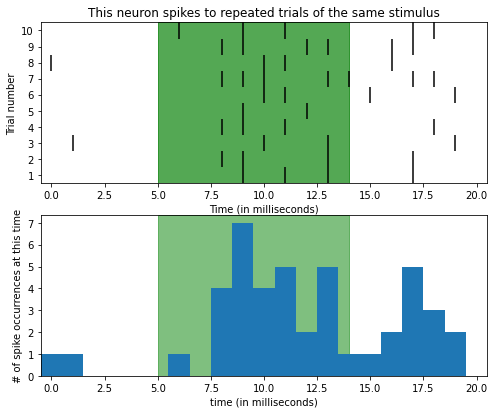

In [14]:
# Construct PSTH below Raster Plot

fig = plt.figure(figsize=[8,6.5])

# Raster plot first
ax = plt.subplot(2,1,1)
for trial in range(len(tenSpikeTrains)):
    spikeTimes = [i for i, x in enumerate(tenSpikeTrains[trial]) if x==1]
    plt.vlines(spikeTimes, trial, trial+1, color='k')      # Plot all trials in raster plot
    plt.axvspan(5, 14, alpha=0.1, color='g')      # Show light timing
plt.xlim(-0.5, 20.5)
plt.xlabel('Time (in milliseconds)')
plt.ylim(0, 10)
plt.yticks([x+0.5 for x in range(10)], [str(x+1) for x in range(10)])  # Centers trials with ticks
plt.ylabel('Trial number')
plt.title('This neuron spikes to repeated trials of the same stimulus')

# Then PSTH
ax=plt.subplot(2,1,2)
plt.axvspan(5, 14, alpha=0.5, color='g')      # Show light timing
ax.bar(range(21), np.sum(tenSpikeTrains, axis=0), width=1)  # Sum across trials (axis=0)
plt.xlabel('time (in milliseconds)')

plt.ylabel('# of spike occurrences at this time')
plt.xlim(-0.5, 20.5)

plt.show()

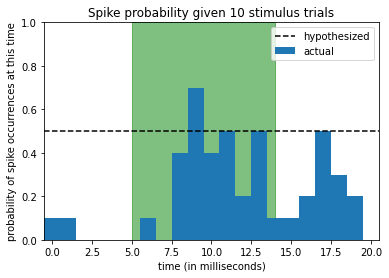

In [15]:
# Hypothesis that stimulated neurons fire at 500 Hz? --> 50% of time bins during stim?

fig = plt.figure()
plt.axvspan(5, 14, alpha=0.5, color='g')      # Show light timing

plt.axhline(y=0.5, xmin=0, xmax=20, linestyle='--', color='k', label='hypothesized')  # Hypothesized value during stim
plt.bar(range(21), np.mean(tenSpikeTrains, axis=0), width=1, label='actual')  # Mean across trials (axis=0)

plt.xlabel('time (in milliseconds)')
plt.ylabel('probability of spike occurrences at this time')
plt.title('Spike probability given 10 stimulus trials')
plt.xlim(-0.5, 20.5)
plt.ylim(0,1)
plt.legend(loc='upper right')

plt.show()

## Vary light intensity. Plot all intensities

Downloaded tenIntensities.pkl from:
https://www.elsevier.com/books-and-journals/book-companion/9780128040430/chapter-files#Chapter%20Files

<ipython-input-16-4619e9ab5ced>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax=plt.subplot(numIntensities,2,float(key[0])*2+1)
<ipython-input-16-4619e9ab5ced>:21: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax=plt.subplot(numIntensities,2,float(key[0])*2+2)


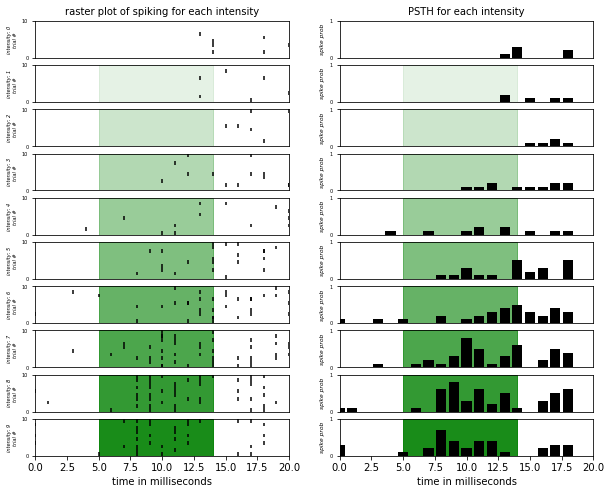

In [16]:
import pandas as pd
tenIntensities = pd.read_pickle('tenIntensities.pkl')

fig = plt.figure(figsize=[10,8])
numIntensities = len(tenIntensities)
nbar={}
for key in tenIntensities.keys():
    ax=plt.subplot(numIntensities,2,float(key[0])*2+1)
    for trial in range(10): # this relies on there being 10 trials per stimulus intensity
        plt.vlines(tenIntensities[key][trial],trial,trial+1, color='k')
    plt.xlim([0,20]);plt.ylim([0,10])
    plt.ylabel('intensity: '+str(key[0])+'\ntrial # ',style='italic',fontsize=5)
    plt.yticks(fontsize=5)
    plt.axvspan(5,14,alpha=0.1*float(key[0]),color='g')
    if float(key[0]) < 9:
        plt.xlabel('');plt.xticks([])
    else:
        plt.xlabel('time in milliseconds')
    if float(key[0]) == 0:
        plt.title('raster plot of spiking for each intensity',fontsize=10)
    ax=plt.subplot(numIntensities,2,float(key[0])*2+2)
    plt.axvspan(5,14,alpha=0.1*float(key[0]),color='g')
    spikeTimes = [a for b in tenIntensities[key] for a in b] #1
    nOut,bins=np.histogram(spikeTimes,bins=range(20))
    nbar[float(key[0])] = nOut/10.
    plt.bar(bins[:-1],nOut/10., color='k')
    plt.xlim([0,20]); plt.ylim([0,1])
    plt.yticks(fontsize=5)
    plt.ylabel('spike prob',style='italic',fontsize = 6)
    if float(key[0]) == 0:
        plt.title('PSTH for each intensity',fontsize=10)
    if float(key[0]) < numIntensities-1:
        plt.xlabel(''); plt.xticks([])
    else:
        plt.xlabel('time in milliseconds')
plt.show()
#plt.savefig('Figure subplot 10 intensity rasters and psths.png')

## Heat maps for more efficient visualization

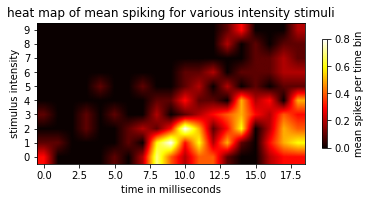

In [26]:
# Begin the Python way for Figure 3.10
from collections import OrderedDict
nbar = OrderedDict(sorted(nbar.items()))
fig = plt.figure()
ax = plt.subplot(111)
aa = ax.imshow(nbar.values(),cmap='hot', interpolation='bilinear')
plt.yticks([x for x in range(10)],[str(x) for x in range(10)[::-1]])
plt.ylabel('stimulus intensity')
plt.xlabel('time in milliseconds')
plt.title('heat map of mean spiking for various intensity stimuli')
cb = fig.colorbar(aa,shrink=0.5) 
cb.ax.set_ylabel('mean spikes per time bin') # End Python way for Figure 3.10
plt.show()

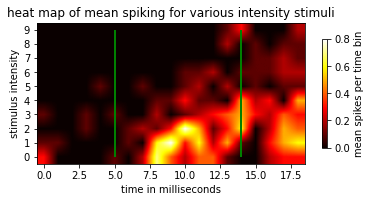

In [27]:
# Begin the Python way for Figure 3.10
from collections import OrderedDict
nbar = OrderedDict(sorted(nbar.items()))
fig = plt.figure()
ax = plt.subplot(111)
aa = ax.imshow(nbar.values(),cmap='hot', interpolation='bilinear')
plt.yticks([x for x in range(10)],[str(x) for x in range(10)[::-1]])
plt.ylabel('stimulus intensity')
plt.xlabel('time in milliseconds')
plt.title('heat map of mean spiking for various intensity stimuli')
cb = fig.colorbar(aa,shrink=0.5) 
cb.ax.set_ylabel('mean spikes per time bin') # End Python way for Figure 3.10
ax.vlines([5,14], [0,0], [9,9], color='g', lw=2) # to show light timing
plt.show()

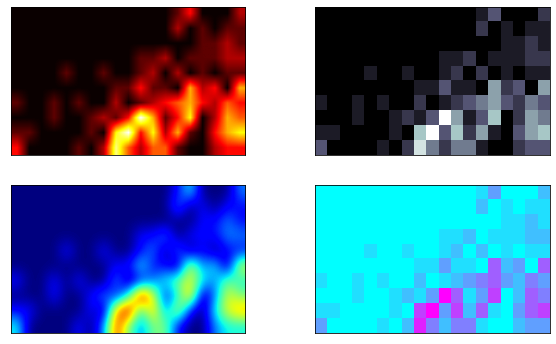

In [18]:
fig = plt.figure(figsize=[10,6]); ax = plt.subplot(221)
aa = ax.imshow(nbar.values(),cmap='hot' ,interpolation='bilinear',aspect=1.2)
plt.yticks([]); plt.xticks([])
ax = plt.subplot(222)
aa = ax.imshow(nbar.values(),cmap='bone', interpolation='nearest',aspect=1.2)
plt.yticks([]); plt.xticks([])
ax = plt.subplot(223);
aa = ax.imshow(nbar.values(),cmap='jet', interpolation='bicubic',aspect=1.2)
plt.yticks([]); plt.xticks([])
ax = plt.subplot(224)
aa = ax.imshow(nbar.values(),cmap='cool', interpolation='nearest',aspect=1.2)
plt.yticks([]); plt.xticks([])
plt.show()

# Next time (March 20)

Chapter 4 - Correlating Spike Trains
![](NDS_4_1.png)
![](NDS_4_3.png)
![](NDS_4_4.png)

Chapter 5 - Analog Signals
![](NDS_5_1.png)